# Dataset for Aspect-Based Sentiment Analysis and Topic Modeling on Borobudur Temple and Prambanan Temple by Dian Arianto
https://github.com/dian9395/dataset-analisis-sentimen-berbasis-aspek-dan-pemodelan-topik

In [1]:
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm import tqdm
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [2]:
df = pd.read_excel('dataset/reviews_borobudur_prambanan_TripAdvisor_GMaps_all_tesis.xlsx')
df_clean = df.dropna()
# print("\nDrop rows with any NaN values:")
df_clean

,id,lokasi,text,daya_tarik,amenitas,aksesibilitas,citra,harga,sdm
0,1.0,Candi Borobudur,peninggalan sejarah yang sudah berumur 1200 ta...,1,-,-,1,0,0
1,2.0,Candi Borobudur,Pertama kali bepergian selama masa pandemi. Ca...,-,1,-,1,-,1
2,3.0,Candi Borobudur,"Candi Borobudur di Magelang, Yogyakarta adalah...",1,-,-,1,-,-
3,4.0,Candi Borobudur,"Baru pertama kali kesini, pas sih kalau tempat...",1,-,-,-,-1,-
4,5.0,Candi Borobudur,"candi borobudur, tempat wisata ini sudah terke...",1,1,-,1,-,-
...,...,...,...,...,...,...,...,...,...
6738,6739.0,Candi Prambanan,The place is great and probably everything you...,1,-,-,-,-1,-
6739,6740.0,Candi Prambanan,Prambanan or Rara Jonggrang (Javanese: ꦫꦫꦗꦺꦴꦁꦒ...,0,-,-,-,-,-
6740,6741.0,Candi Prambanan,This temple is not worth the price. There’s no...,-1,-,-,-1,-1,-1
6741,6742.0,Candi Prambanan,Prambanan temple is the largest hindu temple o...,1,-,-,-,-,-


In [3]:
review = df_clean['text']

## Preprocessing
Emoji processing; case folding; menghapus username, angka, dan tanda baca; koreksi ejaan dan singkatan serta menghapus whitespace; penghapusan stopwords, dan stemming.

In [4]:
import re
# Daftar emoji berdasarkan sentimen
emoji_positif = ["😊", "😄", "♥", "😍", "😘", "😃", "😁", "😆", "😇", "☺"]
emoji_negatif = ["😢", "😠", "😡", "😭", "😱", "😨", "😫", "😩", "😖", "😔"]
emoji_netral = ["👍", "✨", "★", "█", "👌", "♫", "�", "©", "💬", "🔔"]

# Fungsi untuk mengganti emoji dengan label sentimen
def emotion(teks):
    for emoji in emoji_positif:
        teks = teks.replace(emoji, "positif")
    for emoji in emoji_negatif:
        teks = teks.replace(emoji, "negatif")
    for emoji in emoji_netral:
        teks = teks.replace(emoji, "netral")
    return teks

In [5]:
import gdown
# URL dari file Google Drive
stopwords_uci_link = 'https://drive.google.com/uc?id=1qqSuE1tuDCCfsdKgXMC3Nj0jda1LuWXB'
stopwords_nltk_link = 'https://drive.google.com/uc?id=1Ufurgc02rF2_yuFh8GNw1VOpkNbJLKWx'
stopwords_uci_output = 'stopwords_uci.txt'
stopwords_nltk_output = 'stopwords_nltk.txt'
# Mengunduh file
gdown.download(stopwords_uci_link, stopwords_uci_output, quiet=False)
gdown.download(stopwords_nltk_link, stopwords_nltk_output, quiet=False)
# Membaca konten file
with open(stopwords_uci_output, 'r', encoding='utf-8') as file:
    stopwords_uci = file.read()
with open(stopwords_nltk_output, 'r', encoding='utf-8') as file:
    stopwords_nltk = file.read()

Downloading...
From: https://drive.google.com/uc?id=1qqSuE1tuDCCfsdKgXMC3Nj0jda1LuWXB
To: d:\PROJECT\Python-Pro\sa-TripAdvisor\stopwords_uci.txt
100%|██████████| 6.91k/6.91k [00:00<00:00, 1.06MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Ufurgc02rF2_yuFh8GNw1VOpkNbJLKWx
To: d:\PROJECT\Python-Pro\sa-TripAdvisor\stopwords_nltk.txt
100%|██████████| 7.39k/7.39k [00:00<00:00, 922kB/s]


In [6]:
def preprocess(text):
    # text preprocessing
    teks = emotion(text)
    teks = teks.lower()
    teks = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    stop_words = set(stopwords.words('english') + stopwords_uci.split('\n') + stopwords_nltk.split('\n'))
    tokens = word_tokenize(teks)
    filtered_tokens = [word for word in tokens if word.isalnum() and not any(char.isdigit() for char in word) and word not in stop_words]
    stemmer_factory = StemmerFactory()
    sastrawi_stemmer = stemmer_factory.create_stemmer()
    lemmatizer = nltk.WordNetLemmatizer()
    lemma = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    indonesian_stemmed_words = [sastrawi_stemmer.stem(word) for word in lemma]
    clean_reviews = ' '.join(indonesian_stemmed_words)
    return clean_reviews

In [7]:
teks = review.apply(preprocess)
teks

0       tinggal sejarah umur indonesia bangsa indonesi...
1       pertama kali pergi pandemi candi borobudur pro...
2       candi borobudur magelang yogyakarta salah reko...
3       baru kali kesini pa sih ajaib dunia sulit baya...
4       candi borobudur wisata kenal dunia ganti sy wi...
                              ...                        
6738    the place great probably everything expect how...
6739    prambanan rara jonggrang javanese romanized ra...
6740    this temple worth price theres much see poorly...
6741    prambanan temple largest hindu temple ancient ...
6742    best choice three mostfamous temple yogyakarta...
Name: text, Length: 6743, dtype: object

## Ekstraksi Fitur
words n-gram. words unigram+bigram+trigram untuk fiturnya dan vektornya diekstraksi dengan CountVectorizer dari pustaka Scikit-Learn

## Eksperimen

### Analisis Sentimen Berbasis Aspek

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [9]:
preprocess = pd.concat([pd.DataFrame(teks), df_clean['daya_tarik'], df_clean['amenitas'], df_clean['aksesibilitas'], df_clean['citra'], df_clean['harga'], df_clean['sdm']], axis=1)
preprocess.head()

,text,daya_tarik,amenitas,aksesibilitas,citra,harga,sdm
0,tinggal sejarah umur indonesia bangsa indonesi...,1,-,-,1,0,0
1,pertama kali pergi pandemi candi borobudur pro...,-,1,-,1,-,1
2,candi borobudur magelang yogyakarta salah reko...,1,-,-,1,-,-
3,baru kali kesini pa sih ajaib dunia sulit baya...,1,-,-,-,-1,-
4,candi borobudur wisata kenal dunia ganti sy wi...,1,1,-,1,-,-


In [10]:
import pandas as pd
# Melakukan melting pada dataframe
melted_df = preprocess.melt(id_vars=['text'], value_vars=['daya_tarik', 'amenitas', 'aksesibilitas', 'citra', 'harga', 'sdm'],
                    var_name='aspect', value_name='sentiment')
# Menghapus baris dengan nilai '-' pada kolom sentiment
melted_df = melted_df[melted_df['sentiment'] != '-']

melted_df.head()

,text,aspect,sentiment
0,tinggal sejarah umur indonesia bangsa indonesi...,daya_tarik,1
2,candi borobudur magelang yogyakarta salah reko...,daya_tarik,1
3,baru kali kesini pa sih ajaib dunia sulit baya...,daya_tarik,1
4,candi borobudur wisata kenal dunia ganti sy wi...,daya_tarik,1
5,wajar salah ajaib dunia candi bangun tingkat t...,daya_tarik,1


In [11]:
# Mengubah nilai sentiment
sentiment_mapping = {1: 'positive', 0: 'neutral', -1: 'negative'}
melted_df['sentiment'] = melted_df['sentiment'].astype(int).map(sentiment_mapping)
melted_df.head()

,text,aspect,sentiment
0,tinggal sejarah umur indonesia bangsa indonesi...,daya_tarik,positive
2,candi borobudur magelang yogyakarta salah reko...,daya_tarik,positive
3,baru kali kesini pa sih ajaib dunia sulit baya...,daya_tarik,positive
4,candi borobudur wisata kenal dunia ganti sy wi...,daya_tarik,positive
5,wajar salah ajaib dunia candi bangun tingkat t...,daya_tarik,positive


In [12]:
# Memisahkan dataframe berdasarkan aspek
dfs_melted_df = {aspect: melted_df[melted_df['aspect'] == aspect] for aspect in melted_df['aspect'].unique()}

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [14]:
# Daftar algoritma klasifikasi
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier()
}

In [15]:
# Melakukan pelatihan dan evaluasi model untuk setiap aspek dan setiap algoritma
for aspect, df_aspect in dfs_melted_df.items():
    print(f'\nAspect: {aspect}')
    # Membagi data menjadi data latih dan data uji
    X = df_aspect['text']
    y = df_aspect['sentiment']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    for clf_name, clf in classifiers.items():
        # Membuat pipeline dengan TfidfVectorizer dan classifier
        pipeline = Pipeline([
            ('tfidf', TfidfVectorizer(max_features=100000)),
            ('clf', clf)
        ])
        # Melakukan pelatihan model
        pipeline.fit(X_train, y_train)

        # Melakukan prediksi
        y_pred = pipeline.predict(X_test)

        # Evaluasi model
        print(f'\nClassification Report with {clf_name}:')
        print(classification_report(y_test, y_pred))


Aspect: daya_tarik

Classification Report with Naive Bayes:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         9
     neutral       0.00      0.00      0.00        64
    positive       0.94      1.00      0.97      1120

    accuracy                           0.94      1193
   macro avg       0.31      0.33      0.32      1193
weighted avg       0.88      0.94      0.91      1193


Classification Report with Logistic Regression:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         9
     neutral       0.40      0.03      0.06        64
    positive       0.94      1.00      0.97      1120

    accuracy                           0.94      1193
   macro avg       0.45      0.34      0.34      1193
weighted avg       0.90      0.94      0.91      1193


Classification Report with Decision Tree:
              precision    recall  f1-score   support

    negative       0.00      0

In [16]:
# Melakukan pelatihan dan evaluasi model untuk setiap aspek dan setiap algoritma dengan cross-validation
for aspect, df_aspect in dfs_melted_df.items():
    print(f'\nAspect: {aspect}')
    # Membagi data menjadi fitur (X) dan target (y)
    X = df_aspect['text']
    y = df_aspect['sentiment']
    
    for clf_name, clf in classifiers.items():
        # Membuat pipeline dengan TfidfVectorizer dan classifier
        pipeline = Pipeline([
            ('tfidf', TfidfVectorizer(max_features=100000)),
            ('clf', clf)
        ])
        
        # Menggunakan cross-validation untuk menghasilkan prediksi
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        y_pred = cross_val_predict(pipeline, X, y, cv=skf)

        # Evaluasi model
        print(f'\nClassification Report with {clf_name}:')
        print(classification_report(y, y_pred))


Aspect: daya_tarik

Classification Report with Naive Bayes:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        56
     neutral       0.00      0.00      0.00       345
    positive       0.93      1.00      0.97      5561

    accuracy                           0.93      5962
   macro avg       0.31      0.33      0.32      5962
weighted avg       0.87      0.93      0.90      5962


Classification Report with Logistic Regression:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        56
     neutral       0.62      0.01      0.03       345
    positive       0.93      1.00      0.97      5561

    accuracy                           0.93      5962
   macro avg       0.52      0.34      0.33      5962
weighted avg       0.91      0.93      0.90      5962


Classification Report with Decision Tree:
              precision    recall  f1-score   support

    negative       0.04      0

### Pemodelan Topik

In [17]:
token_teks = [i.split() for i in teks]
# print(token_teks)

In [18]:
import gensim
from gensim.models import Phrases

bigram = Phrases(token_teks, min_count=10)
trigram = Phrases(bigram[token_teks])

In [19]:
for idx in range (len(token_teks)):
    for token in bigram[token_teks[idx]]:
        if '_' in token:
            token_teks[idx].append(token)
    for token in trigram[token_teks[idx]]:
        if '_' in token:
            token_teks[idx].append(token)

In [20]:
from gensim import corpora, models
term_dictionary = corpora.Dictionary(token_teks)
term_dictionary.filter_extremes(no_below=5, no_above=0.2)
print(term_dictionary)

Dictionary<4256 unique tokens: ['antri', 'bangga', 'bangsa', 'bangsa_indonesia', 'batas']...>


In [21]:
# build corpus
# Converting List of documents (corpus) into Document Term matrix using dictionary prepared avobe.
doc_term_matrix = [term_dictionary.doc2bow(doc) for doc in token_teks]
# The function doc2bow convert document (a list of words) into the bag-of-words format
print(len(doc_term_matrix))
print(doc_term_matrix[10])

tfidf = models.TfidfModel(doc_term_matrix)
corpus_tfidf = tfidf[doc_term_matrix]

6743
[(1, 1), (7, 3), (9, 2), (13, 1), (26, 1), (28, 1), (33, 3), (35, 1), (62, 1), (73, 1), (83, 1), (97, 2), (98, 1), (140, 1), (161, 1), (166, 1), (168, 1), (183, 3), (185, 1), (195, 1), (196, 1), (197, 1), (198, 1), (199, 1), (200, 3), (201, 1), (202, 1), (203, 1), (204, 1), (205, 1), (206, 1), (207, 1), (208, 1), (209, 1), (210, 1), (211, 1), (212, 1), (213, 1), (214, 1)]


In [22]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
# function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [23]:
start = 2
limit = 7
step = 1

model_list, coherence_values = compute_coherence_values(term_dictionary, corpus=corpus_tfidf, texts=token_teks, start=start, limit=limit, step=step)

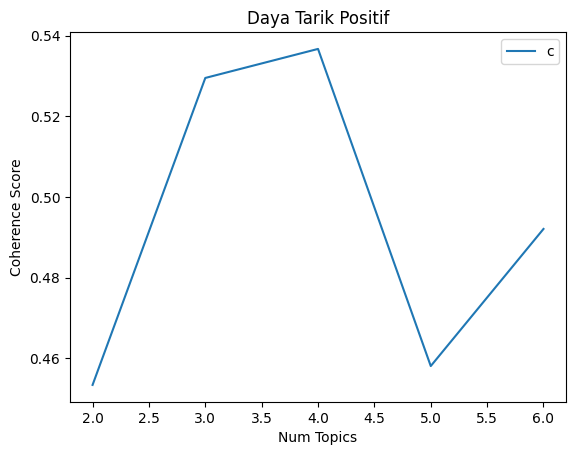

In [24]:
# show graps
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.title("Daya Tarik Positif")
plt.xlabel("Num Topics")
plt.ylabel('Coherence Score')
plt.legend(('coherence_values'), loc='best')
plt.show()

In [25]:
# print the coherence score
for m, cv, in zip(x, coherence_values):
    print('Num TOpics =', m, 'has Coherence Value of', round(cv, 3))

Num TOpics = 2 has Coherence Value of 0.453
Num TOpics = 3 has Coherence Value of 0.53
Num TOpics = 4 has Coherence Value of 0.537
Num TOpics = 5 has Coherence Value of 0.458
Num TOpics = 6 has Coherence Value of 0.492


In [26]:
model = LdaModel(corpus=corpus_tfidf, id2word=term_dictionary, num_topics=6)
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.013*"one_best" + 0.010*"nice_view" + 0.007*"tiket_masuk" + 0.006*"yg" + 0.006*"candi_prambanan" + 0.006*"ratu_boko" + 0.006*"wonderfull" + 0.005*"dont_miss" + 0.005*"harga_tiket" + 0.005*"sejarah"
Topic: 1 Word: 0.024*"great_place" + 0.023*"historical_place" + 0.012*"place" + 0.008*"learn_history" + 0.008*"historical" + 0.007*"amazing" + 0.007*"great" + 0.006*"tour_guide" + 0.006*"roro_jonggrang" + 0.006*"year_ago"
Topic: 2 Word: 0.014*"candi_prambanan" + 0.007*"its_really" + 0.007*"very_nice" + 0.006*"beautifull" + 0.006*"prambanan" + 0.006*"yg" + 0.006*"this_place" + 0.004*"local_guide" + 0.004*"one_wonder" + 0.004*"sejarah"
Topic: 3 Word: 0.009*"world_heritage" + 0.009*"i_love" + 0.008*"historical_site" + 0.007*"place" + 0.005*"love" + 0.005*"spot_foto" + 0.005*"view" + 0.005*"entry_ticket" + 0.005*"the_biggest" + 0.005*"clean_well"
Topic: 4 Word: 0.013*"place" + 0.013*"hindu_temple" + 0.011*"must_visit" + 0.010*"nice_place" + 0.009*"beautiful" + 0.007*"visit" + 0.0

In [27]:
model.show_topics()

[(0,
  '0.013*"one_best" + 0.010*"nice_view" + 0.007*"tiket_masuk" + 0.006*"yg" + 0.006*"candi_prambanan" + 0.006*"ratu_boko" + 0.006*"wonderfull" + 0.005*"dont_miss" + 0.005*"harga_tiket" + 0.005*"sejarah"'),
 (1,
  '0.024*"great_place" + 0.023*"historical_place" + 0.012*"place" + 0.008*"learn_history" + 0.008*"historical" + 0.007*"amazing" + 0.007*"great" + 0.006*"tour_guide" + 0.006*"roro_jonggrang" + 0.006*"year_ago"'),
 (2,
  '0.014*"candi_prambanan" + 0.007*"its_really" + 0.007*"very_nice" + 0.006*"beautifull" + 0.006*"prambanan" + 0.006*"yg" + 0.006*"this_place" + 0.004*"local_guide" + 0.004*"one_wonder" + 0.004*"sejarah"'),
 (3,
  '0.009*"world_heritage" + 0.009*"i_love" + 0.008*"historical_site" + 0.007*"place" + 0.005*"love" + 0.005*"spot_foto" + 0.005*"view" + 0.005*"entry_ticket" + 0.005*"the_biggest" + 0.005*"clean_well"'),
 (4,
  '0.013*"place" + 0.013*"hindu_temple" + 0.011*"must_visit" + 0.010*"nice_place" + 0.009*"beautiful" + 0.007*"visit" + 0.007*"the" + 0.007*"one" 

In [28]:
import pyLDAvis.gensim
import pyLDAvis.gensim_models; pyLDAvis.enable_notebook()
data = pyLDAvis.gensim_models.prepare(model, corpus_tfidf, term_dictionary)

In [29]:
data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.182660 -0.016445       1        1  30.351665
0      0.127923  0.015041       2        1  20.541963
2      0.110088 -0.020044       3        1  18.352408
3     -0.013622 -0.059623       4        1  10.618669
1     -0.031603  0.126300       5        1  10.157942
5     -0.010126 -0.045229       6        1   9.977352, topic_info=                  Term       Freq       Total Category  logprob  loglift
2374       great_place  63.000000   63.000000  Default  30.0000  30.0000
3298  historical_place  64.000000   64.000000  Default  29.0000  29.0000
3634          one_best  70.000000   70.000000  Default  28.0000  28.0000
3239         nice_view  49.000000   49.000000  Default  27.0000  27.0000
2841      hindu_temple  99.000000   99.000000  Default  26.0000  26.0000
...                ...        ...         ...      ...      ...      ...
57               place   8.594151  171.550003   Topic6  -5.6298  -0.6889
1615               the   7.488573   85.296389   Topic6  -5.7675  -0.1279
991                  i   6.964066   69.030300   Topic6  -5.8401   0.0111
304              jogja   6.659951   43.419982   Topic6  -5.8848   0.4300
109                 yg   6.505593   77.523771   Topic6  -5.9082  -0.1731

[383 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
1715      1  0.740633                a
1715      2  0.046290                a
1715      3  0.023145                a
1715      4  0.069434                a
1715      5  0.092579                a
...     ...       ...              ...
109       3  0.322482               yg
109       4  0.077396               yg
109       5  0.064496               yg
109       6  0.090295               yg
2035      4  0.757962  yogyakarta_city

[872 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 3, 4, 2, 6])

## Evaluasi